In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
titanic = pd.read_csv('titanic_data.csv')
print('Este dataset possui %s linhas e %s colunas' % (titanic.shape[0], titanic.shape[1]))
titanic.head()

Este dataset possui 891 linhas e 12 colunas


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.drop(['Ticket','Cabin','PassengerId'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [4]:
titanic.columns = ['Sobreviveu?','Classe','Nome','Sexo','Idade','Irmãos/Cônjuge','Pais/Crianças','Tarifa','Embarque']
titanic.head()

,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [5]:
titanic['Embarque'] = titanic['Embarque'].replace(['S','Q','C'],['Southampton','Queenstown','Cherbourg'])
titanic['Sobreviveu?'] = titanic['Sobreviveu?'].replace([0,1],['Não','Sim'])
titanic['Sexo'] = titanic['Sexo'].replace(['male','female'],['Masculino','Feminino'])

titanic.head(6)

,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
0,Não,3,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,7.2500,Southampton
1,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,71.2833,Cherbourg
2,Sim,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,7.9250,Southampton
3,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,53.1000,Southampton
4,Não,3,"Allen, Mr. William Henry",Masculino,35.0,0,0,8.0500,Southampton
5,Não,3,"Moran, Mr. James",Masculino,NaN,0,0,8.4583,Queenstown


In [6]:
titanic.dtypes

Sobreviveu?        object
Classe              int64
Nome               object
Sexo               object
Idade             float64
Irmãos/Cônjuge      int64
Pais/Crianças       int64
Tarifa            float64
Embarque           object
dtype: object

In [7]:
titanic.describe()

,Classe,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic['Idade'].fillna(0, inplace = True)
titanic.head(6)

,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
0,Não,3,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,7.2500,Southampton
1,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,71.2833,Cherbourg
2,Sim,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,7.9250,Southampton
3,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,53.1000,Southampton
4,Não,3,"Allen, Mr. William Henry",Masculino,35.0,0,0,8.0500,Southampton
5,Não,3,"Moran, Mr. James",Masculino,0.0,0,0,8.4583,Queenstown


In [9]:
titanic.describe()

,Classe,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,23.799293,0.523008,0.381594,32.204208
std,0.836071,17.596074,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.000000,0.000000,0.000000,7.910400
50%,3.000000,24.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
cores = [
         ['#0D47A1','#1565C0','#1976D2','#1E88E5','#2196F3'],
         ['#311B92','#512DA8','#673AB7','#9575CD','#B39DDB'],
         ['#1B5E20','#388E3C','#4CAF50','#81C784','#66BB6A'],
         ['#E65100','#EF6C00','#F57C00','#FB8C00','#FF9800'],
         ['#3E2723','#4E342E','#5D4037','#6D4C41','#795548'],
         ['#BF360C','#D84315','#E64A19','#F4511E','#FF5722'],
         ['#880E4F','#AD1457','#C2185B','#D81B60','#E91E63']
        ]

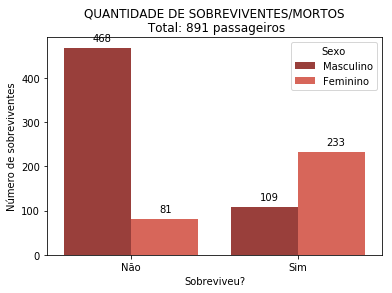

In [11]:
#quantidades de sobreviventes e mortos na tragédia
passageiros = sns.countplot(data=titanic, x='Sobreviveu?', hue='Sexo', palette='Reds_d')

#posicionando valores acima das barras
for p in passageiros.patches:
    b=p.get_bbox()
    passageiros.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.title('QUANTIDADE DE SOBREVIVENTES/MORTOS\n Total: %s passageiros' % (titanic.shape[0]))
plt.xlabel('Sobreviveu?')
plt.ylabel('Número de sobreviventes')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

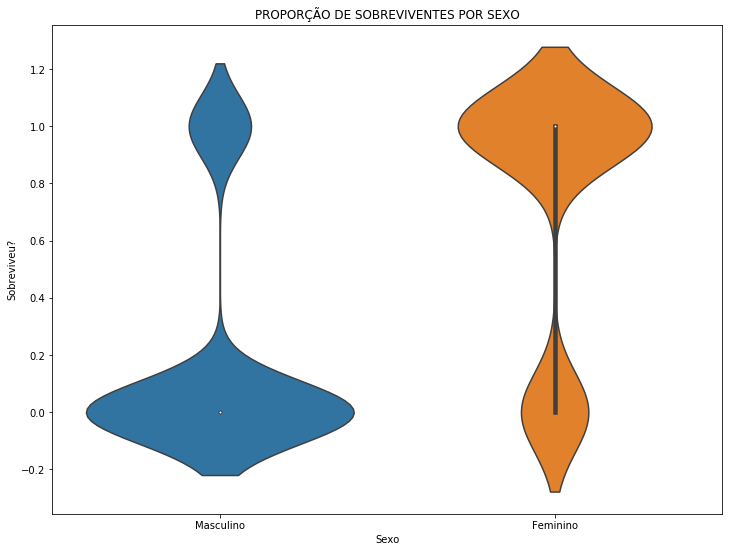

In [12]:
sobreviventes_sexo = titanic.copy()
sobreviventes_sexo['Sobreviveu?'] = titanic['Sobreviveu?'] == 'Sim'

sns.violinplot(data=sobreviventes_sexo, y='Sobreviveu?', x='Sexo', size=10)

plt.title('PROPORÇÃO DE SOBREVIVENTES POR SEXO')
plt.show()

In [15]:
prioritarios = (titanic['Idade'] <= 15) & (titanic['Idade'] > 0) | (titanic['Sexo'] == 'Feminino')
prioritarios = titanic[prioritarios]
prioritarios.head()

,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
1,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,71.2833,Cherbourg
2,Sim,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,7.9250,Southampton
3,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,53.1000,Southampton
7,Não,3,"Palsson, Master. Gosta Leonard",Masculino,2.0,3,1,21.0750,Southampton
8,Sim,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Feminino,27.0,0,2,11.1333,Southampton


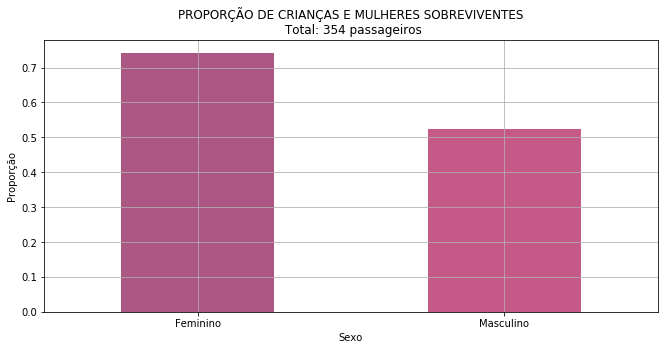

In [18]:
prioritarios.groupby('Sexo')['Sobreviveu?'].apply(lambda x: np.mean(x == 'Sim')).plot(kind='bar', 
                                                                                      color=random.choice(cores), alpha=.7,
                                                                                      figsize=(11,5),rot=0,grid=True)
plt.title('PROPORÇÃO DE CRIANÇAS E MULHERES SOBREVIVENTES\n Total: %s passageiros' % (prioritarios.shape[0]))
plt.ylabel('Proporção')
plt.show()

In [19]:
prioritarios[prioritarios['Idade'] <=15].groupby('Sexo')['Sobreviveu?'].apply(lambda x: np.mean(x == 'Sim'))

Sexo
Feminino     0.666667
Masculino    0.525000
Name: Sobreviveu?, dtype: float64

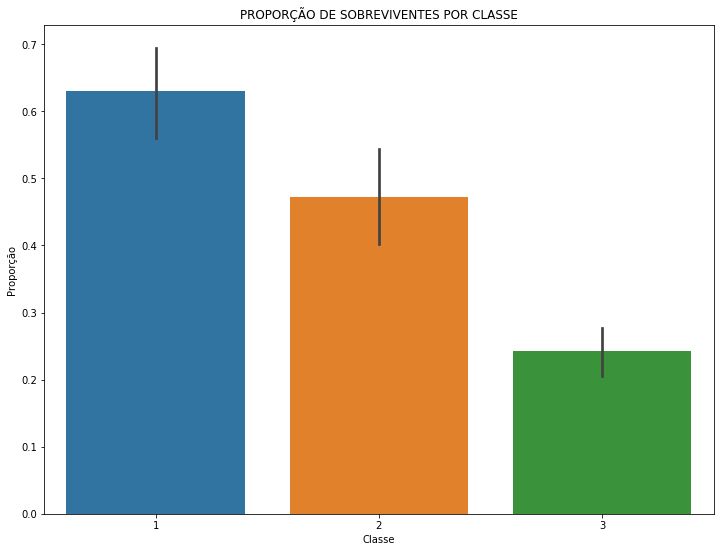

In [20]:
#gerar gráfico dos sobreviventes por classe
sobreviventes_classe = titanic.copy()
sobreviventes_classe['Sobreviveu?'] = titanic['Sobreviveu?'] == 'Sim'

sns.barplot(data=sobreviventes_classe, y='Sobreviveu?', x='Classe')

plt.title('PROPORÇÃO DE SOBREVIVENTES POR CLASSE')
plt.ylabel('Proporção')
plt.show()

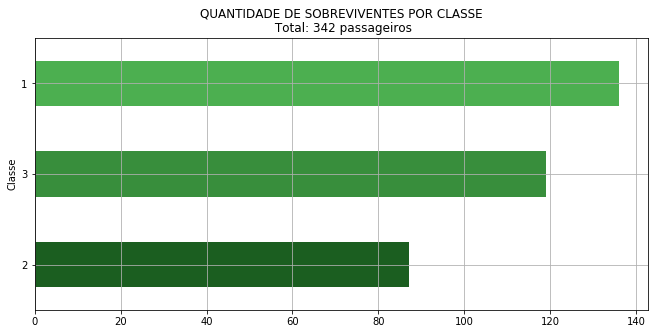

In [32]:
classe_sobrevivente = titanic[titanic['Sobreviveu?'] == 'Sim']['Classe'].value_counts().sort_values(ascending=True)
classe_sobrevivente.plot(kind='barh', figsize=(11,5), color=random.choice(cores), rot=0, grid=True)

plt.title('QUANTIDADE DE SOBREVIVENTES POR CLASSE\n Total: %s passageiros' % (classe_sobrevivente.sum()))
plt.ylabel('Classe')
plt.show()

In [33]:
titanic['Classe'].value_counts()

3    491
1    216
2    184
Name: Classe, dtype: int64

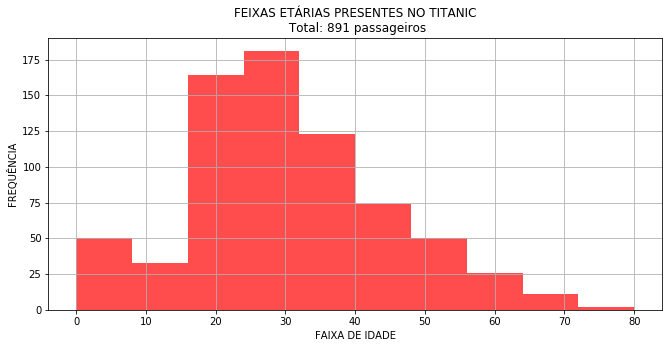

In [37]:
#agrupando passageiros por faixa etária
idades = titanic[titanic['Idade'] > 0.0]['Idade'].astype(int).hist(bins=10, figsize=(11,5), color='red', alpha=.7)

plt.title('FEIXAS ETÁRIAS PRESENTES NO TITANIC\n Total: %s passageiros' % (titanic.shape[0]))
plt.xlabel('FAIXA DE IDADE')
plt.ylabel('FREQUÊNCIA')
plt.show()

In [38]:
passagem_gratuita = titanic[titanic['Tarifa'] == 0].reset_index(drop=True)
passagem_gratuita

,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
0,Não,3,"Leonard, Mr. Lionel",Masculino,36.0,0,0,0.0,Southampton
1,Não,1,"Harrison, Mr. William",Masculino,40.0,0,0,0.0,Southampton
2,Sim,3,"Tornquist, Mr. William Henry",Masculino,25.0,0,0,0.0,Southampton
3,Não,2,"Parkes, Mr. Francis ""Frank""",Masculino,0.0,0,0,0.0,Southampton
4,Não,3,"Johnson, Mr. William Cahoone Jr",Masculino,19.0,0,0,0.0,Southampton
5,Não,2,"Cunningham, Mr. Alfred Fleming",Masculino,0.0,0,0,0.0,Southampton
6,Não,2,"Campbell, Mr. William",Masculino,0.0,0,0,0.0,Southampton
7,Não,2,"Frost, Mr. Anthony Wood ""Archie""",Masculino,0.0,0,0,0.0,Southampton
8,Não,3,"Johnson, Mr. Alfred",Masculino,49.0,0,0,0.0,Southampton
9,Não,1,"Parr, Mr. William Henry Marsh",Masculino,0.0,0,0,0.0,Southampton
